In [1]:
import os
import sys
import json
import pickle
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
conn = sqlite3.connect('./data/example_database.db')

In [3]:
c = conn.cursor()

In [4]:
c.execute('''CREATE TABLE stocks (date text, trans text, symbol text, qty real, price real)''')

In [5]:
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

In [6]:
conn.commit()

In [7]:
c.execute('SELECT * FROM stocks')

In [8]:
stock_data = c.fetchall()

In [9]:
print(stock_data)

[('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)]


In [10]:
conn.close()

In [11]:
with open('./data/stock_data.pickle', 'wb') as file:
    pickle.dump(stock_data, file)

In [12]:
with open('./data/stock_data.json', 'w') as file:
    json.dump(stock_data, file)

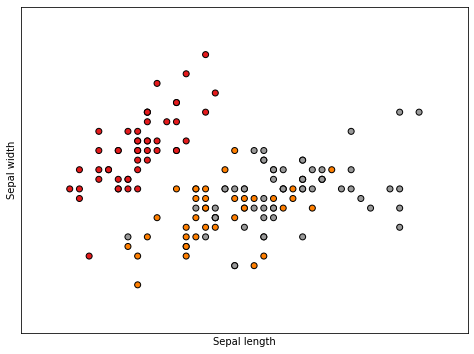

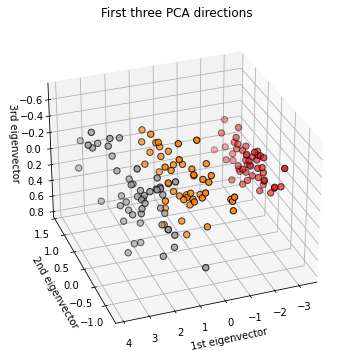

In [13]:
# CODE URL:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('./data/2D_fig.png')

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection='3d', elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.figure.savefig('./data/3D_fig.png')

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


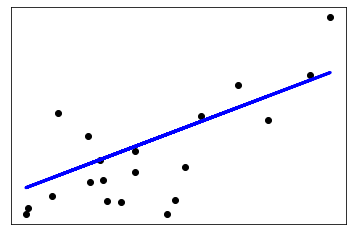

In [14]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.savefig('./data/linear_fig.png')

plt.show()

In [15]:
with open('./data/linear_model.pickle', 'wb') as file:
    pickle.dump(regr, file)

In [16]:
sys.stdout.write(json.dumps([os.listdir('.'), stock_data]))

[[".DS_Store", ".ipynb_checkpoints", "data", "product.sh", "requirements.txt", "solution.ipynb"], [["2006-01-05", "BUY", "RHAT", 100.0, 35.14]]]

144